# Naive Bayes Part 2

**Topics:**
1. Explore spam email dataset
2. sklearn CountVectorizer
3. Types of naive bayes classifiers
4. Sklearn MultinomialNb classifier
5. Sklearn pipeline
6. Exercise

In [1]:
import pandas as pd
df = pd.read_csv('14_spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# data exploration
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

Converting string (text) into binary (0s and 1s) as machine learning models understand only numbers.

In [3]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25)

Spam and ham is converted but message column is still in string format so we need to convert it into binary form by using Count vectorizer.

# What is CountVectorizer

In this technique one of the way to convert is to find out some unique words in each of these documents, lets assume we find that there are total 9 unique words from the entire document and after that take these words and treat them as features or like a columns and we can build matrix as shown:

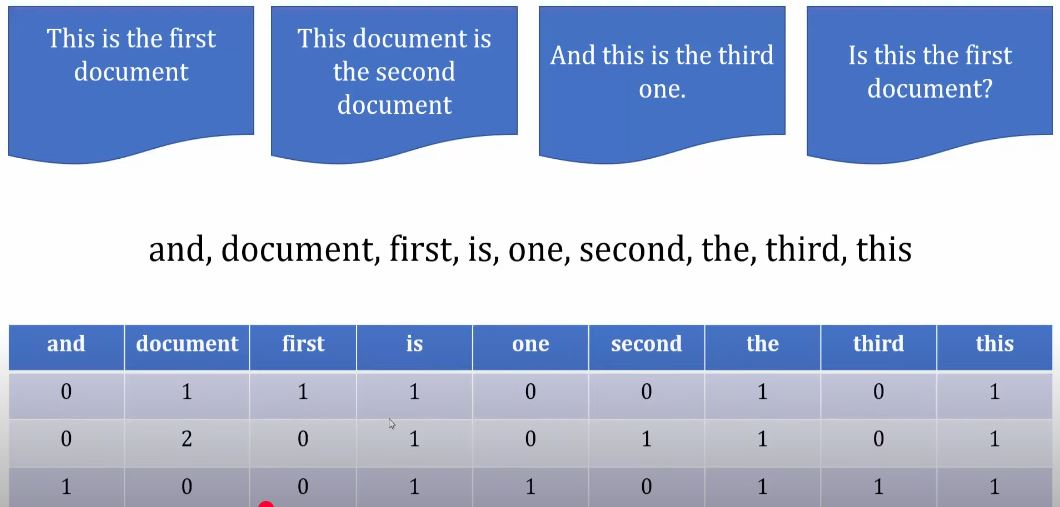

Each line is a separate doc and lets assume in each document the (and) occurance is 0 and in the 2nd doc the  name documents appear to be 2 times etc so this is a simple technique of representing versus count and we can use these individual columns as features for our problem

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Naive bayes has 3 kind of classifiers
# Classifiers
1. Bernoulli NB: It assumes that all our features are binary such that they takes only 2 values i-e 0s can represent (words does not represent in the doc) and 1s as (words occure in doc)

2. Multinomial NB: Its used when we have discrete data eg. movie rating ranges  1 and 5 as each rating will have certain frequency to represent. In text learning we have count of each word to predict the class of label

3. Gaussian NB: Because of the assumption of normal distribution, Gaussian NB is used in cases when all our features are continuous. Eg. in iris dataset the features are sepal,petal width and length. So its features can have different values in dataset as width and length can vary. We cant represent features in terms of their occurrance. Means data is continuous. Hence we use Gaussian NB here.

In [6]:
# Multinomial NB

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [8]:
emails = [
    'Hey hassam, can we get together to watch cricket game tomorrow?',
    "Upto 20% discount on parking, exclusive offer just for you. Don't miss this reward!"
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [9]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9849246231155779

In [10]:
# Sklearn pipelines

In [12]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [13]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [14]:
clf.score(X_test,y_test)

0.9849246231155779

In [15]:
clf.predict(emails)

array([0, 1])